<a href="https://colab.research.google.com/github/xx39xx16/KWU-AI-Programming/blob/main/%08Homework/Homework-5/Homework-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

#데이터셋 읽기
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data_2023/dataset/winequality-red.csv')

print(df['quality'].unique())


Mounted at /content/drive
[5 6 7 4 8 3]


In [ ]:
# 'quality' 열에 대한 원-핫 인코딩
y = pd.get_dummies(df['quality'])

# 'quality' 열을 제외한 나머지를 입력 데이터로 사용
X = df.drop('quality', axis=1)

# 데이터셋의 차원을 확인 (디버깅을 위해)
print(X.shape, y.shape)


(1599, 11) (1599, 6)


In [ ]:
# 데이터 정규화
# 성능 향상을 위해 정규화 부분을 추가해줌
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# test set과 validation set 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# k-폴드 교차 검증 설정
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1  # fold_no 변수 초기화
acc_per_fold = []

# KFold 교차 검증 수행
for train, val in kf.split(X_train, y_train):
    # 훈련 데이터와 검증 데이터 분할
    X_train_fold, X_val_fold = X_train[train], X_train[val]
    y_train_fold, y_val_fold = y_train.iloc[train], y_train.iloc[val]

    # 모델 구축
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train_fold.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train_fold.shape[1], activation='softmax'))

    # 모델 컴파일
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    # 체크포인트 및 얼리 스토핑 설정
    checkpointer = ModelCheckpoint('best_model_fold_{}.h5'.format(fold_no), save_best_only=True, monitor='val_loss', mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    # 모델 학습
    history = model.fit(X_train_fold, y_train_fold, epochs=370, batch_size=36, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping, checkpointer], verbose=1)

     # 성능 평가
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    acc_per_fold.append(scores[1] * 100)

    fold_no += 1

Epoch 1/370
29/29 [==============================] - 2s 18ms/step - loss: 1.5570 - accuracy: 0.4712 - val_loss: 1.3186 - val_accuracy: 0.4961
Epoch 2/370
29/29 [==============================] - 0s 5ms/step - loss: 1.2351 - accuracy: 0.4966 - val_loss: 1.1232 - val_accuracy: 0.5234
Epoch 3/370


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 6ms/step - loss: 1.1458 - accuracy: 0.5337 - val_loss: 1.0854 - val_accuracy: 0.5469
Epoch 4/370
29/29 [==============================] - 0s 6ms/step - loss: 1.1070 - accuracy: 0.5533 - val_loss: 1.0536 - val_accuracy: 0.5586
Epoch 5/370
29/29 [==============================] - 0s 7ms/step - loss: 1.0761 - accuracy: 0.5415 - val_loss: 1.0283 - val_accuracy: 0.5781
Epoch 6/370
29/29 [==============================] - 0s 6ms/step - loss: 1.0485 - accuracy: 0.5562 - val_loss: 1.0221 - val_accuracy: 0.6133
Epoch 7/370
29/29 [==============================] - 0s 7ms/step - loss: 1.0285 - accuracy: 0.5562 - val_loss: 0.9976 - val_accuracy: 0.6172
Epoch 8/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0098 - accuracy: 0.5679 - val_loss: 0.9851 - val_accuracy: 0.6211
Epoch 9/370
29/29 [==============================] - 0s 4ms/step - loss: 0.9986 - accuracy: 0.5826 - val_loss: 0.9816 - val_accuracy: 0.6250
Epoch 10/370
29/29 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 10ms/step - loss: 1.5403 - accuracy: 0.4692 - val_loss: 1.3948 - val_accuracy: 0.6016
Epoch 3/370
29/29 [==============================] - 0s 12ms/step - loss: 1.2971 - accuracy: 0.5464 - val_loss: 1.1985 - val_accuracy: 0.5469
Epoch 4/370
29/29 [==============================] - 0s 13ms/step - loss: 1.1672 - accuracy: 0.5660 - val_loss: 1.1233 - val_accuracy: 0.5508
Epoch 5/370
29/29 [==============================] - 1s 21ms/step - loss: 1.1152 - accuracy: 0.5709 - val_loss: 1.0807 - val_accuracy: 0.5547
Epoch 6/370
29/29 [==============================] - 0s 14ms/step - loss: 1.0777 - accuracy: 0.5689 - val_loss: 1.0445 - val_accuracy: 0.5820
Epoch 7/370
29/29 [==============================] - 1s 18ms/step - loss: 1.0555 - accuracy: 0.5699 - val_loss: 1.0201 - val_accuracy: 0.5742
Epoch 8/370
29/29 [==============================] - 0s 13ms/step - loss: 1.0361 - accuracy: 0.5640 - val_loss: 0.9997 - val_accuracy: 0.5820
Epoch 9/370
29/29 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 5ms/step - loss: 1.1711 - accuracy: 0.5709 - val_loss: 1.1113 - val_accuracy: 0.5508
Epoch 4/370
29/29 [==============================] - 0s 6ms/step - loss: 1.1053 - accuracy: 0.5601 - val_loss: 1.0678 - val_accuracy: 0.5703
Epoch 5/370
29/29 [==============================] - 0s 5ms/step - loss: 1.0635 - accuracy: 0.5709 - val_loss: 1.0393 - val_accuracy: 0.5703
Epoch 6/370
29/29 [==============================] - 0s 6ms/step - loss: 1.0325 - accuracy: 0.5758 - val_loss: 1.0371 - val_accuracy: 0.5938
Epoch 7/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0130 - accuracy: 0.5797 - val_loss: 1.0122 - val_accuracy: 0.5781
Epoch 8/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0016 - accuracy: 0.5904 - val_loss: 1.0104 - val_accuracy: 0.5625
Epoch 9/370
29/29 [==============================] - 0s 4ms/step - loss: 0.9889 - accuracy: 0.5806 - val_loss: 1.0079 - val_accuracy: 0.5977
Epoch 10/370
29/29 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 4ms/step - loss: 1.1995 - accuracy: 0.5318 - val_loss: 1.1659 - val_accuracy: 0.5352
Epoch 4/370
29/29 [==============================] - 0s 4ms/step - loss: 1.1164 - accuracy: 0.5611 - val_loss: 1.1186 - val_accuracy: 0.5703
Epoch 5/370
29/29 [==============================] - 0s 5ms/step - loss: 1.0786 - accuracy: 0.5767 - val_loss: 1.0901 - val_accuracy: 0.5859
Epoch 6/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0579 - accuracy: 0.5806 - val_loss: 1.0665 - val_accuracy: 0.5781
Epoch 7/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0347 - accuracy: 0.5904 - val_loss: 1.0490 - val_accuracy: 0.5703
Epoch 8/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0236 - accuracy: 0.5846 - val_loss: 1.0274 - val_accuracy: 0.5742
Epoch 9/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0100 - accuracy: 0.5806 - val_loss: 1.0132 - val_accuracy: 0.5742
Epoch 10/370
29/29 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 4ms/step - loss: 1.1712 - accuracy: 0.5391 - val_loss: 1.1621 - val_accuracy: 0.5569
Epoch 4/370
29/29 [==============================] - 0s 5ms/step - loss: 1.0970 - accuracy: 0.5801 - val_loss: 1.1401 - val_accuracy: 0.4745
Epoch 5/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0652 - accuracy: 0.5713 - val_loss: 1.0919 - val_accuracy: 0.5490
Epoch 6/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0342 - accuracy: 0.5781 - val_loss: 1.0689 - val_accuracy: 0.5373
Epoch 7/370
29/29 [==============================] - 0s 4ms/step - loss: 1.0112 - accuracy: 0.5898 - val_loss: 1.0618 - val_accuracy: 0.5176
Epoch 8/370
29/29 [==============================] - 0s 4ms/step - loss: 0.9954 - accuracy: 0.5908 - val_loss: 1.0445 - val_accuracy: 0.5451
Epoch 9/370
29/29 [==============================] - 0s 3ms/step - loss: 0.9863 - accuracy: 0.5879 - val_loss: 1.0518 - val_accuracy: 0.5059
Epoch 10/370
29/29 [=====

Average accuracy across all folds: 62.47%


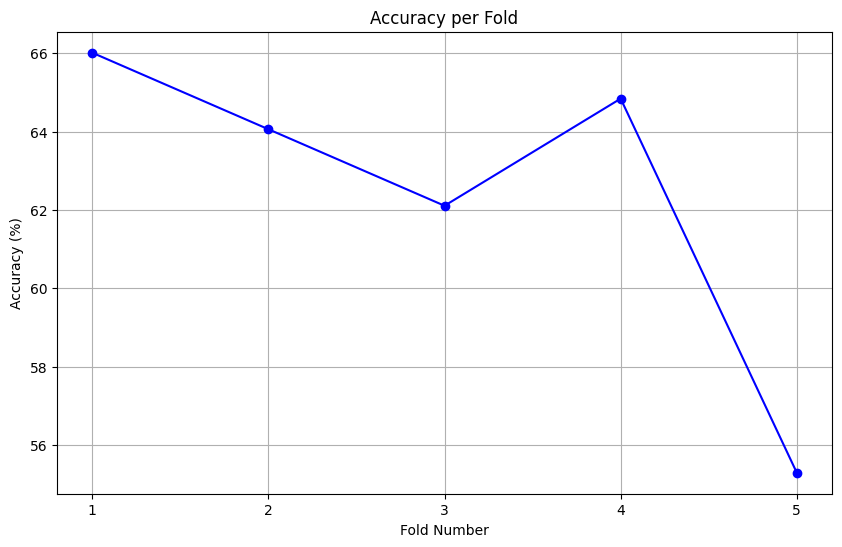

In [ ]:
# 교차 검증 결과 분석
average_accuracy = np.mean(acc_per_fold)
print(f'Average accuracy across all folds: {average_accuracy:.2f}%')

# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), acc_per_fold, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, k+1))
plt.grid(True)
plt.show()


In [ ]:
# 전체 데이터셋에 대한 모델 성능 평가
# 전체 데이터셋에 대해 동일한 모델 아키텍처를 사용하여 학습 및 평가를 수행합
model = Sequential()
model.add(Dense(64, input_shape=(X_scaled.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_scaled, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 1.6591 - accuracy: 0.3465
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 1.2768 - accuracy: 0.4390
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 1.1077 - accuracy: 0.5578
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0446 - accuracy: 0.5710
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0119 - accuracy: 0.5716
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.9954 - accuracy: 0.5791
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 0.9832 - accuracy: 0.5860
Epoch 8/100
50/50 [==============================] - 0s 10ms/step - loss: 0.9774 - accuracy: 0.5866
Epoch 9/100
50/50 [==============================] - 0s 8ms/step - loss: 0.9700 - accuracy: 0.5841
Epoch 10/100
50/50 [==============================] - 0s 7ms/step - loss: 0.9685 - accuracy: 0.5904
Epoch 11

In [ ]:
# 최종 테스트 세트에서 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Set Accuracy: {test_accuracy*100:.2f}%')

Test Set Accuracy: 63.75%
